# Terry Stops #

Let's import all the necessary libraries to analyze the data. The necessary libraries and other functions can be found in the file named `functions.py`.

In [212]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [213]:
from functions import *
%matplotlib inline

Read the data and look at the first rows of data.

In [214]:
df = pd.read_csv('Terry_Stops.csv')
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,...,07:59:00,-,-,-,NaN,N,N,-,-,-
2,-,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,...,19:12:00,-,-,-,NaN,N,-,-,-,-
3,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,...,04:55:00,-,-,-,NaN,N,N,-,-,-
4,-,-1,20150000001739,33155,Field Contact,None,6973,1977,M,White,...,00:41:00,-,-,-,NaN,N,N,-,-,-


At first glance we can see that we have some missing data in the Subjet Age Group as well as Initial Call Type. Also some NaN values on Officer Squad. Let's dig in a little more to view what we hyave to work with.

In [215]:
print(df.isna().sum())
print('----------------------------------------------------------------------------')
print(df.info())

Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               604
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47213 entries, 0 to 47212
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------

It appears as though we have a lot of information to work with and the only feature that has missing data is the `Officer Squad` feature.

Let's cleanup the names of the columns to make it easier to code.

In [216]:
list(df.columns)

['Subject Age Group',
 'Subject ID',
 'GO / SC Num',
 'Terry Stop ID',
 'Stop Resolution',
 'Weapon Type',
 'Officer ID',
 'Officer YOB',
 'Officer Gender',
 'Officer Race',
 'Subject Perceived Race',
 'Subject Perceived Gender',
 'Reported Date',
 'Reported Time',
 'Initial Call Type',
 'Final Call Type',
 'Call Type',
 'Officer Squad',
 'Arrest Flag',
 'Frisk Flag',
 'Precinct',
 'Sector',
 'Beat']

In [217]:
update_col_names = {'Subject Age Group':'sub_age_group', 'Subject ID':'sub_id', 
                    'GO / SC Num':'go_num_sc_num','Terry Stop ID':'terryS_id', 
                    'Stop Resolution':'stop_resolution','Weapon Type':'weapon_type',
                    'Officer ID':'officer_id','Officer YOB':'officer_YOB',
                    'Officer Gender':'officer_gender','Officer Race':'officer_race',
                    'Subject Perceived Race':'sub_perceived_race','Subject Perceived Gender':'sub_perceived_gender',
                    'Reported Date':'reported_date','Reported Time':'reported_time',
                    'Initial Call Type':'initial_calltype','Final Call Type':'final_calltype',
                    'Call Type':'call_type','Officer Squad':'officer_squad',
                    'Arrest Flag':'arrest_flag','Frisk Flag':'frisk_flag',
                    'Precinct':'precinct','Sector':'sector','Beat':'beat'}
df.rename(columns=update_col_names, inplace=True)
df.head()

,sub_age_group,sub_id,go_num_sc_num,terryS_id,stop_resolution,weapon_type,officer_id,officer_YOB,officer_gender,officer_race,...,reported_time,initial_calltype,final_calltype,call_type,officer_squad,arrest_flag,frisk_flag,precinct,sector,beat
0,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,...,07:59:00,-,-,-,NaN,N,N,-,-,-
2,-,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,...,19:12:00,-,-,-,NaN,N,-,-,-,-
3,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,...,04:55:00,-,-,-,NaN,N,N,-,-,-
4,-,-1,20150000001739,33155,Field Contact,None,6973,1977,M,White,...,00:41:00,-,-,-,NaN,N,N,-,-,-


Much better!

## Creating Features from the Data ##

Part of the data that the columns tell us is the officers year of birth, but it does not tell us the officer's age. It seems more reasonable to have an age feature for a cop to help with our prediction model. 

We will use the officer's year of birth and the date that the reported stop was made to figure out the age of the officer when he made the stop.

In [218]:
df.officer_YOB.sort_values(ascending=True)

27062    1900
1058     1900
25205    1900
1080     1900
46088    1900
         ... 
43572    1998
38661    1998
36743    1998
37464    1998
27451    1998
Name: officer_YOB, Length: 47213, dtype: int64

In [219]:
for x in range(len(df.reported_date)):
    df.reported_date = df.reported_date[x][0:10]
    df['year_reported'] = df.reported_date[x][0:4]

In [220]:
df['officer_age'] = df.year_reported.astype(int) - df.officer_YOB

In [221]:
df['officer_age'].sort_values(ascending=False)

35978    115
36308    115
24902    115
38084    115
38025    115
        ... 
11461     17
27451     17
37464     17
12988     17
12044     17
Name: officer_age, Length: 47213, dtype: int64

It is highly unlikely that there were 115 year old officers doing stops. We will filter out those along with officers that are around the 80 year old mark.

In [222]:
df = df[df.officer_age <= 80]

In [223]:
df['officer_age'].sort_values(ascending=False)

5328     69
3869     69
4541     67
45062    67
29523    67
         ..
46555    17
38007    17
38661    17
44108    17
43393    17
Name: officer_age, Length: 47178, dtype: int64

Much better and reasonable.

Now let's categorize the feature `weapon_type` by replacing no weapons found values as 0 and weapons found as 1.

In [224]:
df.weapon_type = df.weapon_type.astype(str)
df.weapon_type.unique()

array(['None', 'Firearm Other', 'Lethal Cutting Instrument', 'Handgun',
       '-', 'Club, Blackjack, Brass Knuckles',
       'Knife/Cutting/Stabbing Instrument', 'Other Firearm', 'Rifle',
       'Fire/Incendiary Device', 'Blunt Object/Striking Implement',
       'Firearm (unk type)', 'Mace/Pepper Spray', 'None/Not Applicable',
       'Club', 'Firearm', 'Taser/Stun Gun', 'Shotgun', 'Brass Knuckles',
       'Automatic Handgun', 'Blackjack',
       'Personal Weapons (hands, feet, etc.)'], dtype=object)

In [225]:
list_to_replace_weapons = ['1', '-', 'None', 'Knife/Cutting/Stabbing Instrument',
       'Other Firearm', 'Rifle', 'Fire/Incendiary Device',
       'Blunt Object/Striking Implement', 'Firearm Other',
       'Lethal Cutting Instrument', 'Handgun', 'Firearm (unk type)',
       'Mace/Pepper Spray', 'None/Not Applicable', 'Club',
       'Club, Blackjack, Brass Knuckles', 'Firearm', 'Taser/Stun Gun',
       'Shotgun', 'Brass Knuckles', 'Automatic Handgun', 'Blackjack',
       'Personal Weapons (hands, feet, etc.)']

df.weapon_type.replace(to_replace='None',value=0, inplace=True)
df.weapon_type.replace(to_replace=list_to_replace_weapons, value=1,inplace=True)

In [226]:
df.weapon_type.head()

0    0
1    0
2    0
3    0
4    0
Name: weapon_type, dtype: int64

In [227]:
df.weapon_type.value_counts()

0    32558
1    14620
Name: weapon_type, dtype: int64

## Rest of the columns ##

In [228]:
df.sub_age_group = df.sub_age_group.astype('category').cat.as_ordered()

In [229]:
df.officer_gender = df.officer_gender.astype('category').cat.as_ordered()

In [230]:
df.officer_gender.value_counts()

M    41780
F     5398
Name: officer_gender, dtype: int64

In [231]:
df.officer_race = df.officer_race.astype('category').cat.as_ordered()

In [232]:
df.sub_perceived_race = df.sub_perceived_race.astype('category').cat.as_ordered()

In [233]:
df.sub_perceived_race.value_counts()

White                                        23034
Black or African American                    14043
Unknown                                       2625
-                                             1883
Hispanic                                      1683
Asian                                         1536
American Indian or Alaska Native              1357
Multi-Racial                                   809
Other                                          152
Native Hawaiian or Other Pacific Islander       56
Name: sub_perceived_race, dtype: int64

In [234]:
df.sub_perceived_gender = df.sub_perceived_gender.astype('category').cat.as_ordered()

In [235]:
df.sub_perceived_gender.value_counts()

Male                                                         36972
Female                                                        9572
Unable to Determine                                            326
-                                                              277
Unknown                                                         25
Gender Diverse (gender non-conforming and/or transgender)        6
Name: sub_perceived_gender, dtype: int64

In [236]:
df.frisk_flag = df.frisk_flag.astype('category').cat.as_ordered()

In [237]:
df.frisk_flag.value_counts()

N    36118
Y    10582
-      478
Name: frisk_flag, dtype: int64

In [238]:
df.call_type = df.call_type.astype('category').cat.as_ordered()

In [239]:
df.call_type.value_counts()

911                              21284
-                                13128
ONVIEW                            9110
TELEPHONE OTHER, NOT 911          3308
ALARM CALL (NOT POLICE ALARM)      340
TEXT MESSAGE                         7
SCHEDULED EVENT (RECURRING)          1
Name: call_type, dtype: int64

## Encoding target values ##

In [173]:
df.stop_resolution.value_counts()

Field Contact               18966
Offense Report              15642
Arrest                      11663
Referred for Prosecution      728
Citation / Infraction         179
Name: stop_resolution, dtype: int64

In [174]:
new_target_values = {'Arrest':1,
                     'Field Contact':0,
                     'Citation / Infraction':0,
                     'Offense Report':0,
                     'Referred for Prosecution':0}

In [175]:
df['stop_resolution'].replace(new_target_values, inplace=True)

## Splitting the data ##

In [176]:
x_feats = ['sub_age_group','weapon_type','officer_gender','officer_race','sub_perceived_race',
           'sub_perceived_gender','frisk_flag','call_type','officer_age']

In [177]:
X = df[x_feats]
y = df['stop_resolution']

In [193]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X,y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train_all, y_train_all, random_state=42)

In [194]:
ohe = OneHotEncoder()
X_train = ohe.fit_transform(X_train)
X_test = ohe.fit_transform(X_test)

In [195]:
logreg = LogisticRegression()

In [196]:
model_1 = logreg.fit(X_train, y_train)

/Users/edgarbarron/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [197]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [198]:
print('F1 score for training data: {}'.format(f1_score(y_train, y_hat_train)))
print('-------------------------------------------')
print('F1 score for testing data: {}'.format(f1_score(y_test, y_hat_test)))

F1 score for training data: 0.10407117821515234
-------------------------------------------
F1 score for testing data: 0.04033884630899556


F1 score appears to be at 10% which is not good.

Let's visualize this with a confusion matrix.

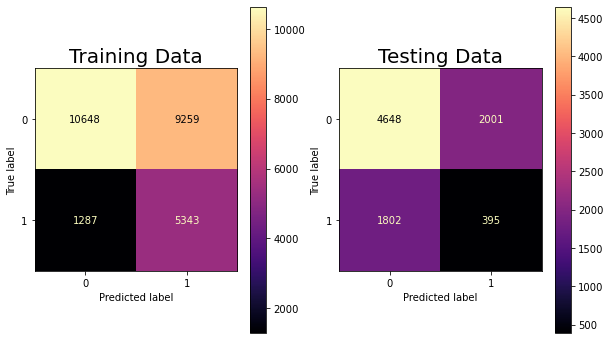

In [211]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,6))
plot_confusion_matrix(logreg, X_train, y_train, cmap=plt.cm.magma, ax=ax1)
plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.magma, ax=ax2)
ax1.set_title('Training Data', size=20)
ax2.set_title('Testing Data', size=20)
plt.show()

In [205]:
smote = SMOTE()
X_train_resampled, y_train_resampled  = smote.fit_sample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_sample(X_test,y_test)

In [206]:
print(pd.Series(y_train_resampled).value_counts())
print('-------------------------------------')
print(pd.Series(y_test_resampled).value_counts())

1    19907
0    19907
Name: stop_resolution, dtype: int64
-------------------------------------
1    6649
0    6649
Name: stop_resolution, dtype: int64


In [207]:
model_2 = logreg.fit(X_train_resampled, y_train_resampled)

/Users/edgarbarron/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [208]:
y_hat_train2 = logreg.predict(X_train_resampled)
y_hat_test2 = logreg.predict(X_test_resampled)

In [210]:
print('F1 score for training data: {}'.format(f1_score(y_train_resampled, y_hat_train2)))
print('-------------------------------------------')
print('F1 score for testing data: {}'.format(f1_score(y_test_resampled, y_hat_test2)))

F1 score for training data: 0.7262364886996397
-------------------------------------------
F1 score for testing data: 0.21759736245621264


We see that the training data has a way higher score than the testing score which may mean we are overfitting the data a bit. We will perform some regularization to prevent this.

In [49]:
scale = MinMaxScaler()
X_train_transformed = scale.fit_transform(X_train_resampled)
X_test_transformed = scale.transform(X_test)

In [50]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train_transformed, y_train_resampled)

lasso = Lasso(alpha=0.5)
lasso.fit(X_train_transformed, y_train_resampled)

lin = LinearRegression()
lin.fit(X_train_transformed, y_train_resampled)

LinearRegression()

In [51]:
y_h_ridge_train = ridge.predict(X_train_transformed)
y_h_ridge_test = ridge.predict(X_test_transformed)

y_h_lasso_train = lasso.predict(X_train_transformed)
y_h_lasso_test = lasso.predict(X_test_transformed)

y_h_lin_train = lin.predict(X_train_transformed)
y_h_lin_test = lin.predict(X_test_transformed)

In [54]:
y_train_resampled

0        1.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
39867    1.0
39868    1.0
39869    1.0
39870    1.0
39871    1.0
Name: stop_resolution, Length: 39872, dtype: float64

In [52]:
# Generate preditions for training and test sets
print('Train Error Ridge Model', np.sum((y_train_resampled - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((y_train_resampled - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train_resampled - lin.predict(X_train_transformed))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test_transformed))**2))

Train Error Ridge Model 8194.495704372943
Test Error Ridge Model 1944.3285642812364


Train Error Lasso Model 9968.0
Test Error Lasso Model 2211.5


Train Error Unpenalized Linear Model 8194.393766114665
Test Error Unpenalized Linear Model 1944.5698692303708


In [53]:
print('Ridge parameter coefficients:', ridge.coef_)
print('Lasso parameter coefficients:', lasso.coef_)
print('Linear model parameter coefficients:', lin.coef_)

Ridge parameter coefficients: [-0.03431172  0.05527785  0.12991867  0.15211727  0.14181769  0.1191826
  0.08130374  0.08228333 -0.10910781 -0.12779754 -0.07461949 -0.16139769
 -0.08734983 -0.04109543 -0.01587842  0.28774552  0.27910043  0.30010039
  0.27293466  0.22205971  0.24114304  0.2693132   0.23657506  0.28326524
 -0.2606062  -0.51324245 -0.25486011 -0.12705319 -0.52070531 -0.05184996
  0.08121381 -0.05835194 -0.13330565 -0.13449168 -0.39048054  0.
 -0.15424141 -0.1652162  -0.09282825 -0.11856117 -0.17419516 -0.1372087
 -0.14549671 -0.13974152 -0.13097248 -0.11705605 -0.14766037 -0.17351278
 -0.0621378  -0.14704785 -0.1431922  -0.15560482 -0.15938387 -0.12549707
 -0.14739285 -0.13663524 -0.15686652 -0.11008539 -0.14008634  0.42611673
  0.25812105  0.42113009  0.          0.38058083  0.77885409]
Lasso parameter coefficients: [ 0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0.
 -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0.
 -0. -0.  0.

In [ ]:
lasso = LassoCV(max_iter=100, cv=5)
lasso.fit(X_train_transformed, y_h_lasso_train)
run_model(lasso, X_train_transformed, X_test_transformed, y_h_lasso_train, y_h_lasso_test)
print('The optimal alpha for the Lasso Regression is: ', lasso.alpha_)

In [ ]:
lasso_penalized = Lasso(alpha=3.6588363303797415e-05)
lasso_penalized.fit(X_train_transformed, y_train)

In [ ]:
y_train_preds_lasso_pen = lasso_penalized.predict(X_train_transformed)
y_test_preds_lasso_pen = lasso_penalized.predict(X_test_transformed)

In [ ]:
print('F1 score for training data: {}'.format(f1_score(y_train, y_train_preds_lasso_pen)))
print('-------------------------------------------')
print('F1 score for testing data: {}'.format(f1_score(y_test, y_test_preds_lasso_pen)))